# Tides acting on a post- natal kick binary

Study of the impact of tides on non-coplanar binaries

In this notebook we show the results of different stellar binary evolutions in which the only difference is the
inclination between the pre- and post- orbital planes

### load modules

In [1]:
# auto load modules, no need to restart kernel
%load_ext autoreload
%autoreload 2

from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
import numpy as np

# custom module to read MESA output
from mesa_reader import *

### utility functions

#### 1. find_tams_age

Provides the value of the TAMS for a star

#### 2. group_consecutives

Group lists by consecutive numbers. Useful when having several mass-transfer (MT) phases

In [2]:
def find_tams_age(center_h1, age):
    '''Find the value of the terminal age main sequence (TAMS)'''
    for k, h1 in enumerate(center_h1):
        if h1 < 1e-4:
            return age[k]


def group_consecutives(vals, step=1):
    '''Return list of consecutive lists of numbers from vals (number list)
    '''
    run = []
    result = [run]
    expect = None
    for v in vals:
        if (v == expect) or (expect is None):
            run.append(int(v))
        else:
            run = [int(v)]
            result.append(run)
        expect = int(v) + step
    return result

### inclinations explored

We explored the following inclinations within MESA: $i = 0, 25, 50, 75, 100, 125, 150, 175$ to cover the entire
range of possible values ($0 < i < 180$)

In [3]:
inclinations = [0, 25, 50, 75, 100, 125, 150, 175]

### config options for matplotlib line colors

In [4]:
colors = ['C0', 'C1', 'red', 'green', 'black', 'gray', 'pink']
color = cm.rainbow(np.linspace(0, 1, len(inclinations[1:])))

---

## First, we explore the results of changing the inclination in a binary in which the separation is wide enough that the star interacts with the BH when is burning He in its core (late Case B):

## $\quad\quad\quad\quad\quad\quad$ $P_{\mathrm{orb}} = 279 \, \mathrm{d}$ , $e = 0.45$

### load data

In [5]:
root = '../data/porb2.79d2_e4.5dm1'

t_tams = dict()
binary, companion = dict(), dict()
for inclination in inclinations:
    companion[inclination] = MesaInfo(f'{root}/i{inclination}/LOGS/history.data')
    binary[inclination] = MesaInfo(f'{root}/i{inclination}/binary_history.data')
    t_tams[inclination] = find_tams_age(companion[inclination].data.center_h1, companion[inclination].data.star_age)

## plots

### HR diagram

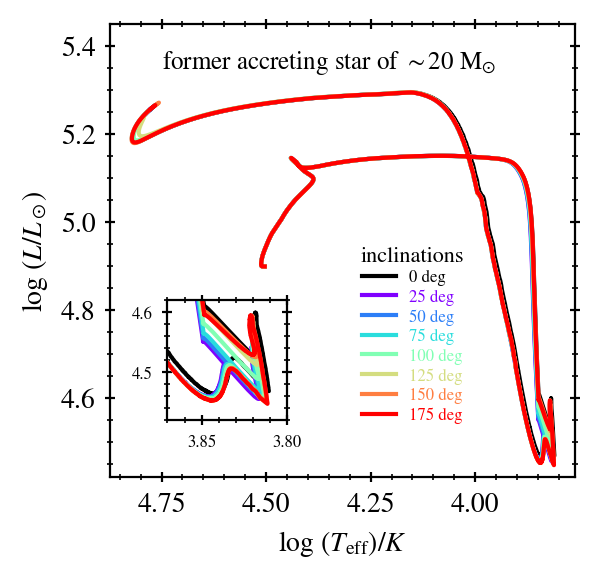

In [6]:
plt.style.use('style.mpl')
fig, ax = plt.subplots(figsize=(3,3))
ax.invert_xaxis()
ax.set_ylim([4.42, 5.45])

ax.set_xlabel('$\\log\,(T_{\\rm eff})/K$')
ax.set_ylabel('$\\log\,(L/L_\\odot)$')

left, bottom, width, height = [0.22, 0.22, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])

ax2.set_xlim([3.87, 3.8])
ax2.set_ylim([4.42, 4.62])

ax.plot(companion[0].data.log_Teff, companion[0].data.log_L,
        color='black', label='0 deg');
ax2.plot(companion[0].data.log_Teff, companion[0].data.log_L,
        color='black');

for k, inclination in enumerate(inclinations[1:]):
    ax.plot(companion[inclination].data.log_Teff, companion[inclination].data.log_L,
           color=color[k], label=f'{inclination} deg');
    ax2.plot(companion[inclination].data.log_Teff, companion[inclination].data.log_L,
           color=color[k]);

leg = ax.legend(bbox_to_anchor=(0.8,0.55), title='inclinations', fontsize=6, title_fontsize=8);
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())
    
msun = '{\\odot}'
ax.annotate(f'former accreting star of $\sim 20$ M$_{msun}$', xy=(4.75, 5.35), fontsize=9)

# reduce fontsize for inset plot
for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label] +
             ax2.get_xticklabels() + ax2.get_yticklabels()):
    item.set_fontsize(6);

### evolution of orbital parameters

### - inclination

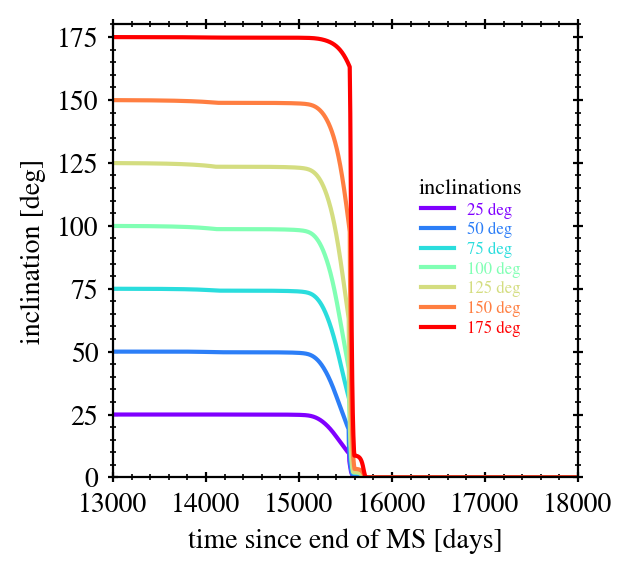

In [7]:
plt.style.use('style.mpl')
fig, ax = plt.subplots(figsize=(3,3))
ax.invert_xaxis()

ax.set_xlim([1.3e4, 1.8e4])
ax.set_ylim([0, 180])

ax.set_xlabel('time since end of MS [days]')
ax.set_ylabel('inclination [deg]')

for k, inclination in enumerate(inclinations[1:]):
    ax.plot(binary[inclination].data.age - t_tams[inclination], binary[inclination].data.inclination,
           color=color[k], label=f'{inclination} deg')

leg = ax.legend(bbox_to_anchor=(0.92,0.7), title='inclinations', fontsize=6, title_fontsize=8);
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color());

### - orbital period

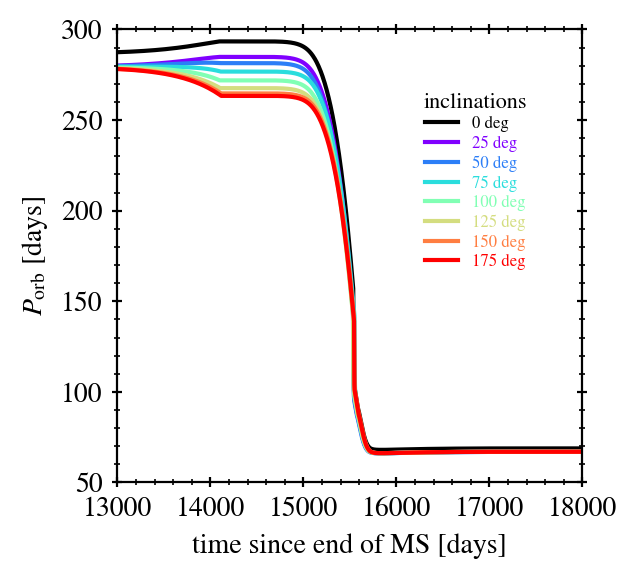

In [8]:
plt.style.use('style.mpl')
fig, ax = plt.subplots(figsize=(3,3))
ax.invert_xaxis()

ax.set_xlim([1.3e4, 1.8e4])
ax.set_ylim([50, 300])

ax.set_xlabel('time since end of MS [days]')
latex = '{\\rm orb}'
ax.set_ylabel(f'$P_{latex}$ [days]')

ax.plot(binary[0].data.age - t_tams[0], binary[0].data.period_days,
           color='black', label='0 deg')

for k, inclination in enumerate(inclinations[1:]):
    ax.plot(binary[inclination].data.age - t_tams[inclination], binary[inclination].data.period_days,
           color=color[k], label=f'{inclination} deg')

leg = ax.legend(bbox_to_anchor=(0.92,0.9), title='inclinations', fontsize=6, title_fontsize=8);
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color());

### - eccentricity

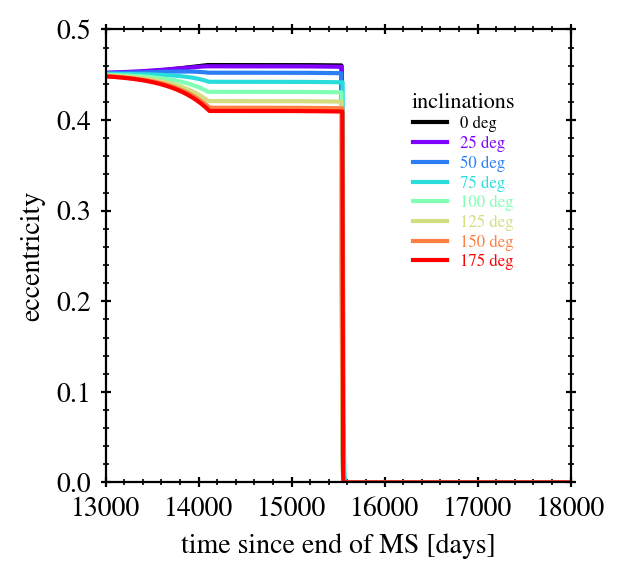

In [9]:
plt.style.use('style.mpl')
fig, ax = plt.subplots(figsize=(3,3))
ax.invert_xaxis()

ax.set_xlim([1.3e4, 1.8e4])
ax.set_ylim([0, 0.5])

ax.set_xlabel('time since end of MS [days]')
ax.set_ylabel('eccentricity')

ax.plot(binary[0].data.age - t_tams[0], binary[0].data.eccentricity,
           color='black', label='0 deg')

for k, inclination in enumerate(inclinations[1:]):
    ax.plot(binary[inclination].data.age - t_tams[inclination], binary[inclination].data.eccentricity,
           color=color[k], label=f'{inclination} deg')

leg = ax.legend(bbox_to_anchor=(0.92,0.9), title='inclinations', fontsize=6, title_fontsize=8);
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color());

### - rotational period

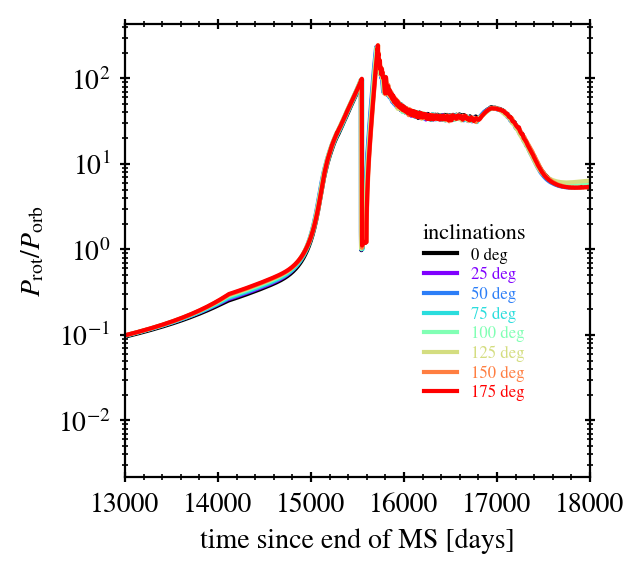

In [10]:
plt.style.use('style.mpl')
fig, ax = plt.subplots(figsize=(3,3))
ax.invert_xaxis()
ax.set_yscale('log')

ax.set_xlim([1.3e4, 1.8e4])

ax.set_xlabel('time since end of MS [days]')
latex_rot = '{\\rm rot}'
latex_orb = '{\\rm orb}'
ax.set_ylabel(f'$P_{latex_rot}/P_{latex_orb}$')

ax.plot(binary[0].data.age - t_tams[0], binary[0].data.P_rot_div_P_orb_1,
           color='black', label='0 deg')

for k, inclination in enumerate(inclinations[1:]):
    ax.plot(binary[inclination].data.age - t_tams[inclination], binary[inclination].data.P_rot_div_P_orb_1,
           color=color[k], label=f'{inclination} deg')

leg = ax.legend(bbox_to_anchor=(0.6,0.6), title='inclinations', fontsize=6, title_fontsize=8);
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color());
    
# ax2 = ax.twinx()
# ax2.set_yscale('log')
# ax2.set_ylabel(f'$\\Omega_{latex_rot}/\\Omega_{latex_orb}$')
# for k, inclination in enumerate(inclinations):
#     ax2.plot(binary[inclination].data.star_1_mass, companion[inclination].data.Omega_div_Omega_eq,
#            color=color[k], linestyle=':');

### - same as before but altogether

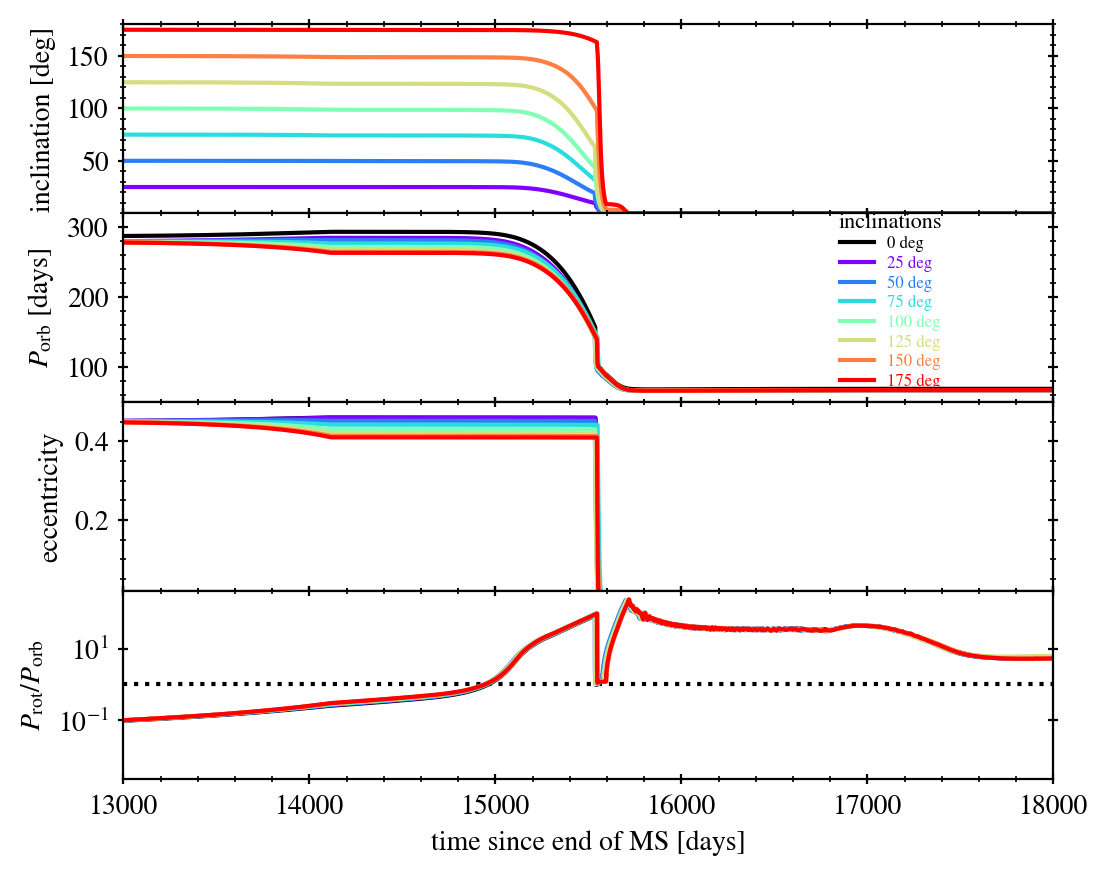

In [11]:
plt.style.use('style.mpl')
fig, axs = plt.subplots(figsize=(6,5), nrows=4, sharex=True)
plt.subplots_adjust(hspace=0)

axs[-1].set_xlim([1.3e4, 1.8e4])
axs[-1].set_xlabel('time since end of MS [days]')

# first, inclination
axs[0].set_ylim([0.02, 180])
axs[0].set_ylabel('inclination [deg]')

for k, inclination in enumerate(inclinations[1:]):
    axs[0].plot(binary[inclination].data.age - t_tams[inclination], binary[inclination].data.inclination,
           color=color[k])
    
# then, orbital period
axs[1].set_ylim([50, 320])
latex = '{\\rm orb}'
axs[1].set_ylabel(f'$P_{latex}$ [days]')

axs[1].plot(binary[0].data.age - t_tams[0], binary[0].data.period_days,
           color='black', label='0 deg')
for k, inclination in enumerate(inclinations[1:]):
    axs[1].plot(binary[inclination].data.age - t_tams[inclination], binary[inclination].data.period_days,
           color=color[k], label=f'{inclination} deg')

leg = axs[1].legend(loc=1, bbox_to_anchor=(0.9,1.1), title='inclinations', fontsize=6, title_fontsize=8);
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color());
    
# follows the eccentricity
axs[2].set_ylim([0.02, 0.5])
axs[2].set_ylabel('eccentricity')

axs[2].plot(binary[0].data.age - t_tams[0], binary[0].data.eccentricity,
           color='black', label='0 deg')
for k, inclination in enumerate(inclinations[1:]):
    axs[2].plot(binary[inclination].data.age - t_tams[inclination], binary[inclination].data.eccentricity,
           color=color[k])

# finally, the rotational period of the donor star
axs[3].set_yscale('log')

latex_rot = '{\\rm rot}'
latex_orb = '{\\rm orb}'
axs[3].set_ylabel(f'$P_{latex_rot}/P_{latex_orb}$')

axs[3].axhline(y=1, ls=':', color='black')

axs[3].plot(binary[0].data.age - t_tams[0], binary[0].data.P_rot_div_P_orb_1,
           color='black', label='0 deg')

for k, inclination in enumerate(inclinations[1:]):
    axs[3].plot(binary[inclination].data.age - t_tams[inclination], binary[inclination].data.P_rot_div_P_orb_1,
           color=color[k])
    
# plt.savefig('tides_porb279_e0.45.svg')

#### Mass-transfer (R > RL) starts at about 15500 yrs after the end of the MS:

In [12]:
age_init_MT = np.zeros(len(inclinations))
for k, i in enumerate(inclinations):
    mask = binary[i].data.star_1_radius > binary[i].data.rl_1
    age_init_MT[k] = binary[i].data.age[mask][0] - t_tams[i]
print(np.mean(age_init_MT))

15542.114031292906


---

## Secondly, we explore a binary tight enough that the star interacts with the BH just after leaving the MS, i.e., when its crossing the HG (early Case B):

## $\quad\quad\quad\quad\quad\quad$ $P_{\mathrm{orb}} = 5 \, \mathrm{d}$ , $e = 0.2$

### load data

In [13]:
root = '../data/porb5d0_e2dm1'

t_tams = dict()
binary, companion = dict(), dict()
for inclination in inclinations:
    companion[inclination] = MesaInfo(f'{root}/i{inclination}/LOGS/history.data')
    binary[inclination] = MesaInfo(f'{root}/i{inclination}/binary_history.data')
    t_tams[inclination] = find_tams_age(companion[inclination].data.center_h1, companion[inclination].data.star_age)

## plots

### - HR diagram

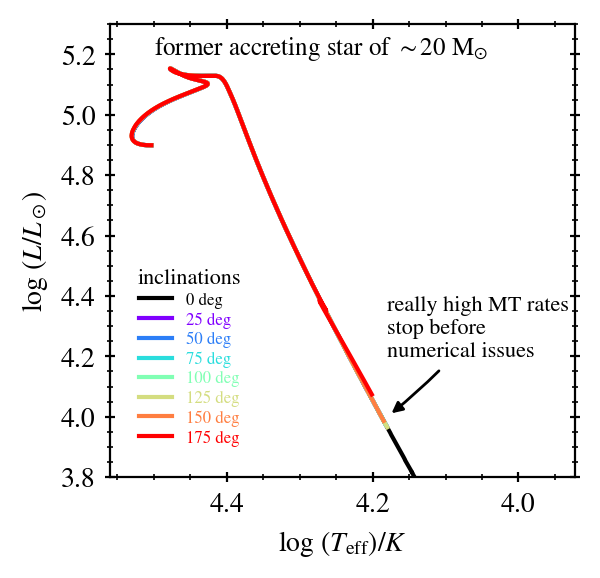

In [14]:
plt.style.use('style.mpl')
fig, ax = plt.subplots(figsize=(3,3))
ax.invert_xaxis()
ax.set_ylim([3.8, 5.3])

ax.set_xlabel('$\\log\,(T_{\\rm eff})/K$')
ax.set_ylabel('$\\log\,(L/L_\\odot)$')

ax.plot(companion[0].data.log_Teff, companion[0].data.log_L,
           color='black', label='0 deg');

for k, inclination in enumerate(inclinations[1:]):
    ax.plot(companion[inclination].data.log_Teff, companion[inclination].data.log_L,
           color=color[k], label=f'{inclination} deg');

leg = ax.legend(bbox_to_anchor=(0.32,0.5), title='inclinations', fontsize=6, title_fontsize=8);
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())
    
msun = '{\\odot}'
ax.annotate(f'former accreting star of $\sim 20$ M$_{msun}$', xy=(4.5, 5.2), fontsize=9);

ax.annotate('really high MT rates\nstop before\nnumerical issues', xy=(4.18,4.0), xytext=(4.18,4.2), fontsize=8,
           arrowprops=dict(
                    arrowstyle='-|>', connectionstyle="arc3,rad=-0.05",
                    color="k",
                ));

### - inclination

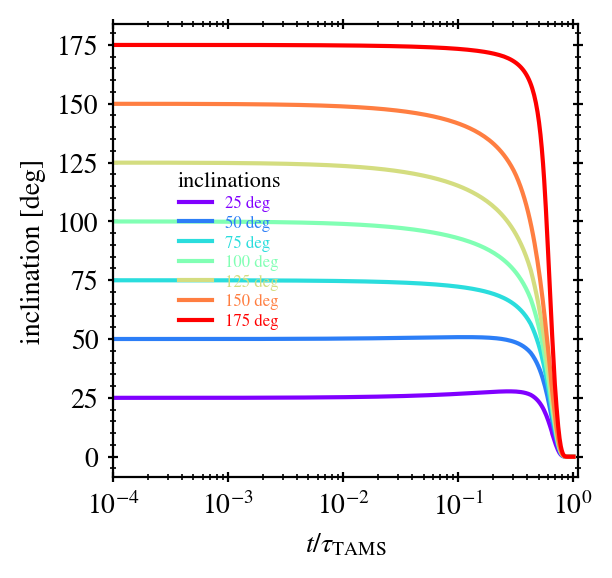

In [15]:
plt.style.use('style.mpl')
fig, ax = plt.subplots(figsize=(3,3))
ax.set_xscale('log')
ax.set_xlim([1e-4, 1.1])

ax.set_xlabel('$t / \\tau_{\\rm TAMS}$')
ax.set_ylabel('inclination [deg]')

for k, inclination in enumerate(inclinations[1:]):
    ax.plot(binary[inclination].data.age/t_tams[inclination], binary[inclination].data.inclination,
           color=color[k], label=f'{inclination} deg')

leg = ax.legend(bbox_to_anchor=(0.4,0.5), title='inclinations', fontsize=6, title_fontsize=8);
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color());

### - orbital period

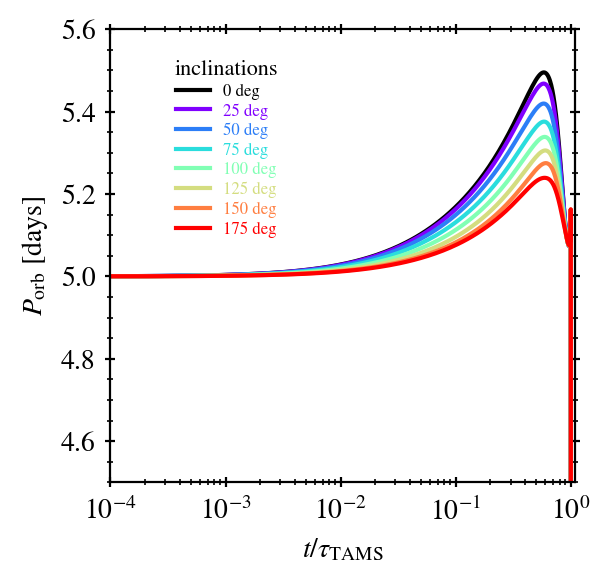

In [16]:
plt.style.use('style.mpl')
fig, ax = plt.subplots(figsize=(3,3))
ax.set_ylim([4.5,5.6])
ax.set_xscale('log')
ax.set_xlim([1e-4, 1.1])

ax.set_xlabel('$t / \\tau_{\\rm TAMS}$')
latex = '{\\rm orb}'
ax.set_ylabel(f'$P_{latex}$ [days]')

ax.plot(binary[0].data.age/t_tams[0], binary[0].data.period_days,
           color='black', label='0 deg')

for k, inclination in enumerate(inclinations[1:]):
    ax.plot(binary[inclination].data.age/t_tams[inclination], binary[inclination].data.period_days,
           color=color[k], label=f'{inclination} deg')

leg = ax.legend(bbox_to_anchor=(0.4,0.5), title='inclinations', fontsize=6, title_fontsize=8);
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color());

### - eccentricity

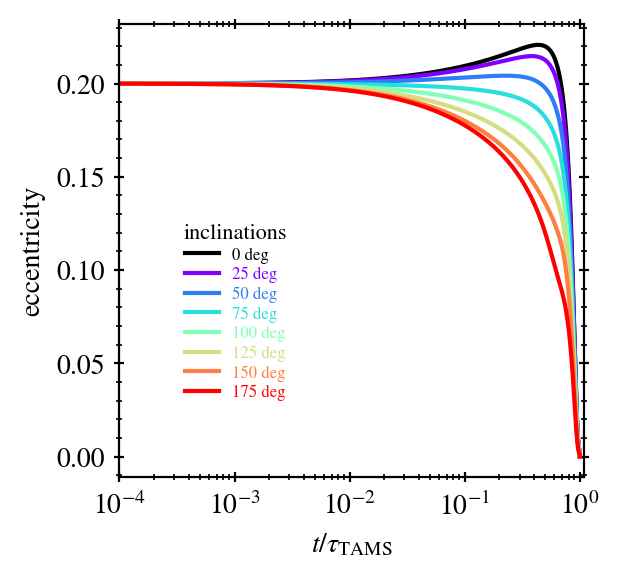

In [17]:
plt.style.use('style.mpl')
fig, ax = plt.subplots(figsize=(3,3))
ax.set_xscale('log')
ax.set_xlim([1e-4, 1.1])

ax.set_xlabel('$t / \\tau_{\\rm TAMS}$')
ax.set_ylabel('eccentricity')

ax.plot(binary[0].data.age/t_tams[0], binary[0].data.eccentricity,
           color='black', label='0 deg')

for k, inclination in enumerate(inclinations[1:]):
    ax.plot(binary[inclination].data.age/t_tams[inclination], binary[inclination].data.eccentricity,
           color=color[k], label=f'{inclination} deg')

leg = ax.legend(bbox_to_anchor=(0.4,0.6), title='inclinations', fontsize=6, title_fontsize=8);
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color());

### - rotational period

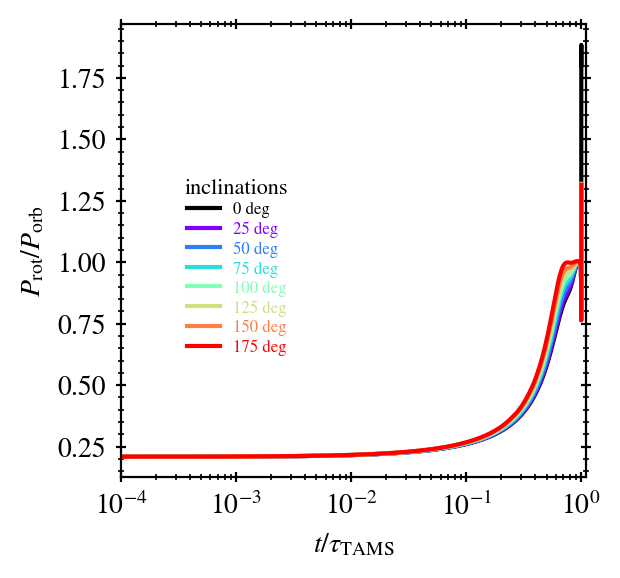

In [18]:
plt.style.use('style.mpl')
fig, ax = plt.subplots(figsize=(3,3))
ax.set_xscale('log')
ax.set_xlim([1e-4, 1.1])

ax.set_xlabel('$t / \\tau_{\\rm TAMS}$')
latex_rot = '{\\rm rot}'
latex_orb = '{\\rm orb}'
ax.set_ylabel(f'$P_{latex_rot}/P_{latex_orb}$')

ax.plot(binary[0].data.age/t_tams[0], binary[0].data.P_rot_div_P_orb_1,
           color='black', label='0 deg')

for k, inclination in enumerate(inclinations[1:]):
    ax.plot(binary[inclination].data.age/t_tams[inclination], binary[inclination].data.P_rot_div_P_orb_1,
           color=color[k], label=f'{inclination} deg')
    # ax2.plot(binary[inclination].data.star_1_mass, binary[inclination].data.P_rot_div_P_orb_1,
    #        color=color[k], label=f'{inclination} deg')

leg = ax.legend(bbox_to_anchor=(0.4,0.7), title='inclinations', fontsize=6, title_fontsize=8);
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color());
    
# left, bottom, width, height = [0.3, 0.4, 0.2, 0.2]
# ax2 = fig.add_axes([left, bottom, width, height])

# ax2.set_xlim([20.4, 20.3])
# ax2.set_ylim([0.7, 1.05])

# ax3 = ax.twinx()
# ax2.set_yscale('log')
# ax3.set_ylabel(f'$\\Omega_{latex_rot}/\\Omega_{latex_orb}$')
# for k, inclination in enumerate(inclinations):
#     ax3.plot(binary[inclination].data.star_1_mass, companion[inclination].data.Omega_div_Omega_eq,
#            color=color[k], linestyle=':');
    
# reduce fontsize for inset plot
# for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label] +
#              ax2.get_xticklabels() + ax2.get_yticklabels()):
#     item.set_fontsize(6);

### - same as before but altogether

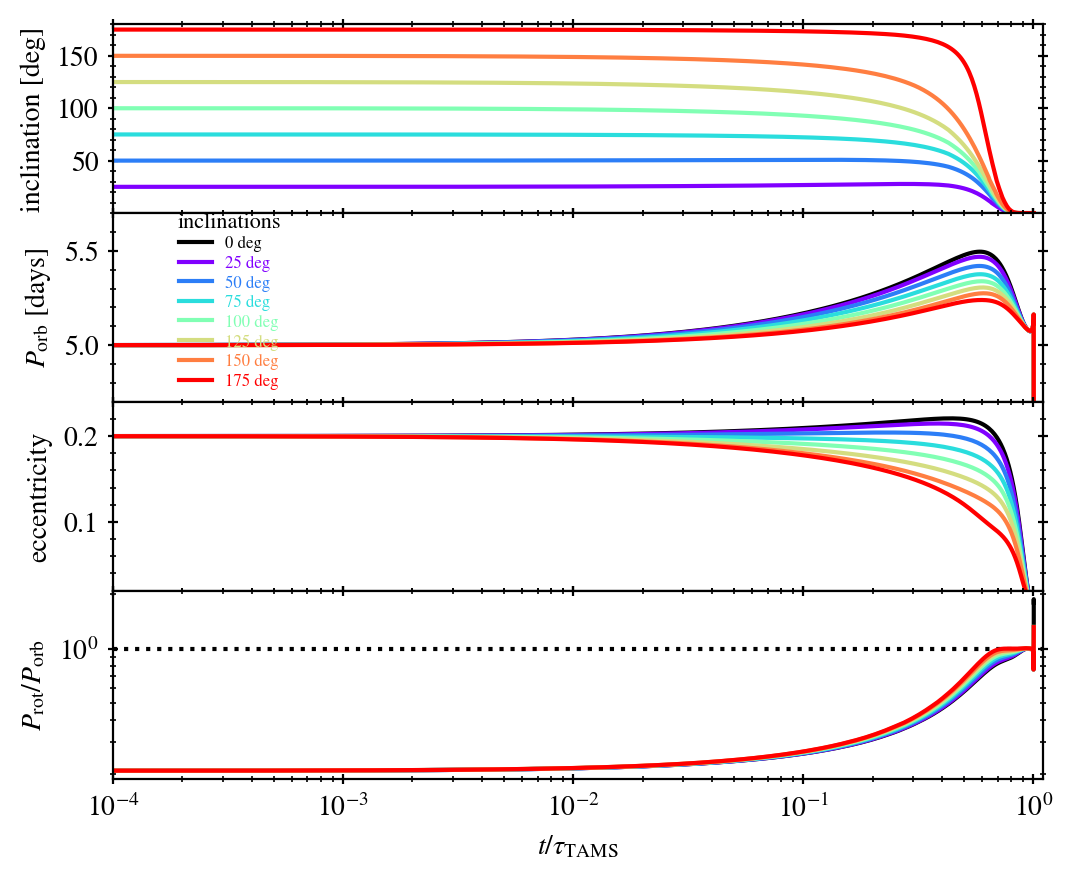

In [19]:
plt.style.use('style.mpl')
fig, axs = plt.subplots(figsize=(6,5), nrows=4, sharex=True)
plt.subplots_adjust(hspace=0)

axs[-1].set_xscale('log')
axs[-1].set_xlim([1e-4, 1.1])
axs[-1].set_xlabel('$t / \\tau_{\\rm TAMS}$')

# first, inclination
axs[0].set_ylim([0.02, 180])
axs[0].set_ylabel('inclination [deg]')

for k, inclination in enumerate(inclinations[1:]):
    axs[0].plot(binary[inclination].data.age/t_tams[inclination], binary[inclination].data.inclination,
           color=color[k])
    
# then, orbital period
axs[1].set_ylim([4.7, 5.7])
latex = '{\\rm orb}'
axs[1].set_ylabel(f'$P_{latex}$ [days]')

axs[1].plot(binary[0].data.age/t_tams[0], binary[0].data.period_days,
           color='black', label='0 deg')
for k, inclination in enumerate(inclinations[1:]):
    axs[1].plot(binary[inclination].data.age/t_tams[inclination], binary[inclination].data.period_days,
           color=color[k], label=f'{inclination} deg')

leg = axs[1].legend(loc=1, bbox_to_anchor=(0.2,1.1), title='inclinations', fontsize=6, title_fontsize=8);
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color());
    
# follows the eccentricity
axs[2].set_ylim([0.02, 0.24])
axs[2].set_ylabel('eccentricity')

axs[2].plot(binary[0].data.age/t_tams[0], binary[0].data.eccentricity,
           color='black', label='0 deg')
for k, inclination in enumerate(inclinations[1:]):
    axs[2].plot(binary[inclination].data.age/t_tams[inclination], binary[inclination].data.eccentricity,
           color=color[k])

# finally, the rotational period of the donor star
axs[3].set_yscale('log')

latex_rot = '{\\rm rot}'
latex_orb = '{\\rm orb}'
axs[3].set_ylabel(f'$P_{latex_rot}/P_{latex_orb}$')

axs[3].axhline(y=1, ls=':', color='black')

axs[3].plot(binary[0].data.age/t_tams[0], binary[0].data.P_rot_div_P_orb_1,
           color='black', label='0 deg')

for k, inclination in enumerate(inclinations[1:]):
    axs[3].plot(binary[inclination].data.age/t_tams[inclination], binary[inclination].data.P_rot_div_P_orb_1,
           color=color[k])
    
# plt.savefig('tides_porb5_e0.2.svg')